<a href="https://colab.research.google.com/github/mar4ello-hash/mnist-deep-learning/blob/main/ML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Task 1: Train an MNIST Deep Learning network to recognise the digits 0 to 9 from MNIST***

In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Data preprocessing***

11501568/11490434 [==============================] - 0s 0us/step
MNIST Train:  (50000, 28, 28)
MNIST Test:  (10000, 28, 28)
MNIST Valid:  (10000, 28, 28)
AddNIST Test:  (10000, 3, 28, 28)

Sample before normalization:


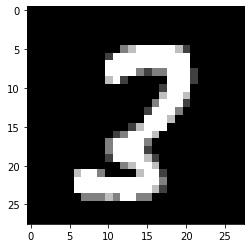


Sample after normalization:


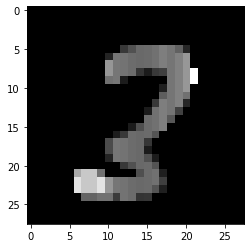

In [ ]:
# AddNIST dataset
test_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_y.npy", allow_pickle=True)

# MNIST dataset
mnist = tf.keras.datasets.mnist
(mnist_train_X, mnist_train_y), (mnist_test_X, mnist_test_y) = mnist.load_data()

# Splitting mnist_train data into train and valid 
mnist_train_X, mnist_valid_X, mnist_train_y, mnist_valid_y = train_test_split(mnist_train_X, mnist_train_y, train_size=5/6)

print('MNIST Train: ', (mnist_train_X.shape))
print('MNIST Test: ', (mnist_test_X.shape))
print('MNIST Valid: ', (mnist_valid_X.shape))

print('AddNIST Test: ', (test_X.shape))

# Image before data normalization
print('\nSample before normalization:')
plt.imshow(mnist_train_X[0], cmap=plt.get_cmap('gray'))
plt.show()
# print(train_X[0])

# Data normalization for better training
mnist_train_X = tf.keras.utils.normalize(mnist_train_X, axis=1)
mnist_test_X = tf.keras.utils.normalize(mnist_test_X, axis=1)
mnsit_valid_X = tf.keras.utils.normalize(mnist_valid_X, axis=1)

# Image after data normalization
print('\nSample after normalization:')
plt.imshow(mnist_train_X[0], cmap=plt.get_cmap('gray'))
plt.show()
# print(train_X[0])

### ***Model building***

In [ ]:
def build_model(x, y):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, activation='relu'))

    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x, y, epochs=20, batch_size=64, validation_data=(mnist_valid_X, mnist_valid_y))

    return model, history

### ***MNIST model overview***

In [ ]:
mnist_model, history = build_model(mnist_train_X, mnist_train_y)

# Model summary
mnist_model.summary()
mnist_model.save('mnist_DL.model')

Epoch 1/20
782/782 [==============================] - 5s 4ms/step - loss: 0.2927 - accuracy: 0.9124 - val_loss: 100.5325 - val_accuracy: 0.9221
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1124 - accuracy: 0.9650 - val_loss: 74.0472 - val_accuracy: 0.9483
Epoch 3/20
676/782 [========================>.....] - ETA: 0s - loss: 0.0753 - accuracy: 0.9758

KeyboardInterrupt: ignored

### ***AddNIST Visualization***

In [ ]:
# Stephen's code

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):
    fig = plt.figure(constrained_layout=True,figsize=(6,4), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(y)
    #main_ax.imshow(np.moveaxis(x, 0, -1))# .imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

### ***AddNIST Sample(s) prediction***

In [ ]:
# Single sample prediction - test_X[i]
def SamplePred(x, model):

    digits = []
    print('___________________________________________\n',
          'Color Channels:')
    for i in range(3):
      
      # Color channel separation
      piece = x.copy()
      piece[:i] = 0
      piece[i+1:] = 0
      piece[i] = piece[i]-piece[i].min()

      # Prediction of a single channel
      prediction = np.argmax(model.predict(np.array([piece[i]]))) # (None, 28, 28)

      print(i+1, 'digit:', prediction)
      digits.append(prediction)

    finalPrediction = sum(digits) - 1

    return finalPrediction

# Dataset predictions - test_X
def dataPred(x, model, length):

    # test_X[0] = 10000 (Computationally expensive)

    finalPred = np.array([])

    for i in range(length): # (i, 3, 28, 28)

      digits = np.array([])      
      for j in range(3):
        
        piece = x[i].copy()
        piece[:j] = 0
        piece[j+1:] = 0
        piece[j] = piece[j]-piece[j].min()

        prediction = np.argmax(model.predict(np.array([piece[j]])))
        digits = np.append(digits, prediction) 
      
      finalPred = np.append(finalPred, sum(digits) - 1).astype(int)

    return finalPred

### ***Random Sample Prediction***

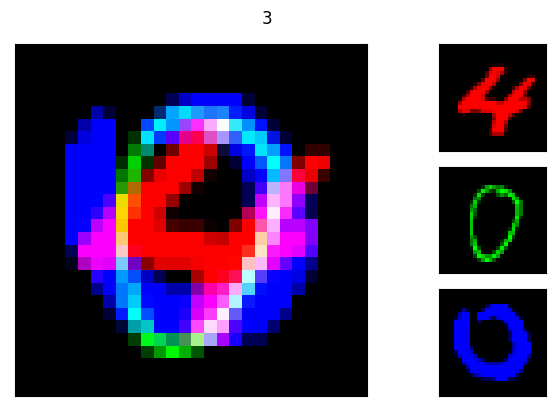

___________________________________________
 Color Channels:
1 digit: 4
2 digit: 0
3 digit: 0
 Final prediction for your sample using MNIST Deep Learning model: 3


In [ ]:
import random

count = test_X.shape[0]
ri = random.randrange(count)

# Visualization
show_mnist_examples(test_X[ri], test_y[ri])

# Random Sample Prediction
prediction = SamplePred(test_X[ri], mnist_model)

print('================================================================\n',
      'Final prediction for your sample using MNIST Deep Learning model:', prediction)



### ***First 400 predictions***

In [ ]:
pr = dataPred(test_X, mnist_model, 400)

### ***Overall Solution Metrics***

In [ ]:
# Since we are getting our final prediction outside of the model:
from sklearn.metrics import f1_score

# Loss & Accuracy using MNIST test x, y
val_loss, val_acc = mnist_model.evaluate(mnist_test_X, mnist_test_y, verbose=0)

# True values y
tr = test_y[:400]
# tr = tf.keras.utils.to_categorical(tr, num_classes=20)

# F1 score 2*(precision*recall/precision+recall)
print('Metrics\n',
      '___________________________________________\n',
      'Accuracy: ', val_acc, '\n',
      'Loss: ', val_loss, '\n',
      'F1 score:', f1_score(tr, pr, average='micro'))


Metrics
 ___________________________________________
 Accuracy:  0.9743000268936157 
 Loss:  0.12172293663024902 
 F1 score: 0.9225


### ***True vs Predicted values***

In [ ]:
for i in range(len(tr)):

    if(tr[i] == pr[i]):
      print(i, ' True value: ', tr[i], ' Predicted value: ', pr[i])

    else:
      print(i, '\033[2;37;41m True value: ', tr[i], ' Predicted value: ', pr[i], '\033[0;0m')
 

0  True value:  4  Predicted value:  4
1  True value:  15  Predicted value:  15
2  True value:  1  Predicted value:  1
3  True value:  5  Predicted value:  5
4  True value:  17  Predicted value:  17
5  True value:  19  Predicted value:  19
6  True value:  1  Predicted value:  1
7  True value:  14  Predicted value:  14
8  True value:  8  Predicted value:  8
9  True value:  13  Predicted value:  13
10  True value:  18  Predicted value:  18
11  True value:  18  Predicted value:  18
12  True value:  12  Predicted value:  12
13  True value:  19  Predicted value:  19
14  True value:  18  Predicted value:  18
15  True value:  16  Predicted value:  16
16  True value:  14  Predicted value:  14
17  True value:  9  Predicted value:  9
18  True value:  10  Predicted value:  10
19  True value:  0  Predicted value:  0
20  True value:  3  Predicted value:  3
21  True value:  1  Predicted value:  1
22  True value:  15  Predicted value:  15
23  True value:  19  Predicted value:  12 
24  True value:  16